In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score

In [3]:
import tensorflow

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.datasets import mnist
from keras.callbacks import EarlyStopping

In [5]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


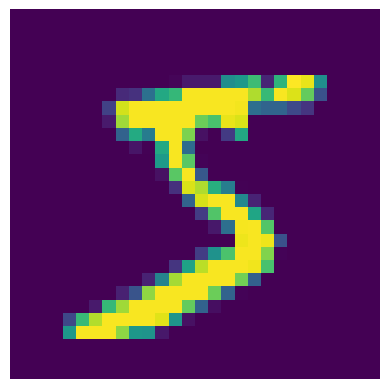

In [6]:
plt.imshow(X_train[0])
plt.axis('off')
plt.show()

In [7]:
mod=Sequential()

In [8]:
mod.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
mod.add(MaxPooling2D(pool_size=(2,2)))
mod.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
mod.add(MaxPooling2D(pool_size=(2,2)))
mod.add(Flatten())
mod.add(Dense(128,activation='relu'))
mod.add(Dropout(0.5))
mod.add(Dense(10,activation='softmax'))

In [9]:
mod.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
mod.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),validation_split=0.2,callbacks=[EarlyStopping(patience=3)])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.7522 - loss: 1.7986 - val_accuracy: 0.9787 - val_loss: 0.0743
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9541 - loss: 0.1537 - val_accuracy: 0.9839 - val_loss: 0.0577
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9677 - loss: 0.1147 - val_accuracy: 0.9858 - val_loss: 0.0532
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9744 - loss: 0.0915 - val_accuracy: 0.9863 - val_loss: 0.0439
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9762 - loss: 0.0800 - val_accuracy: 0.9869 - val_loss: 0.0464
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9803 - loss: 0.0682 - val_accuracy: 0.9848 - val_loss: 0.0451
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9813 - loss: 0.0656 - val_accuracy: 0.9852 - val_loss: 0.0455


In [11]:
y_pred_probs = mod.predict(X_test)
y_prd = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [12]:
print(f"Accuracy Score: {accuracy_score(y_test,y_prd):.4f}")

Accuracy Score: 0.9852


In [13]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.97      1.00      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [14]:
mod.save("handWritten.keras")

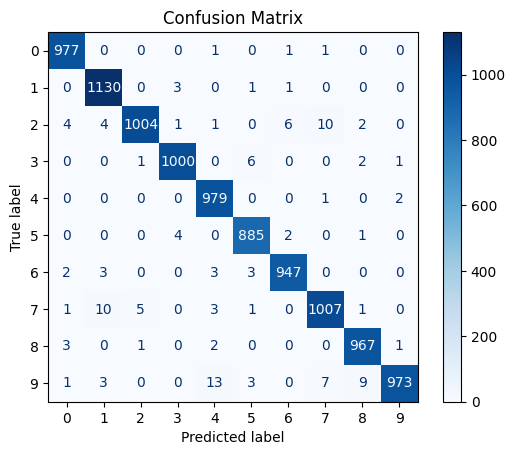

In [ ]:
cm = confusion_matrix(y_test, y_prd)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()